In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [7]:
Cper = pd.read_csv('../IDF/Caso_personas/Simulación_con_personas.csv',names=['tiempo','PMV_jorge','PPD_jorge','PMV_Jorge_Otro','PPD_Jorge_Otro'],skiprows=1)
Cper.tiempo = Cper.tiempo.str.replace('24:00:00','23:59:59')
Cper.tiempo = '2019 ' + Cper.tiempo
Cper.tiempo = pd.to_datetime(Cper.tiempo,format='%Y %m/%d %H:%M:%S')
Cper.set_index('tiempo',inplace=True)
Cper

,PMV_jorge,PPD_jorge,PMV_Jorge_Otro,PPD_Jorge_Otro
tiempo,,,,
2019-05-03 00:10:00,-1.355303,43.145356,-1.355303,43.145356
2019-05-03 00:20:00,-1.442903,47.810747,-1.442903,47.810747
2019-05-03 00:30:00,-1.283665,39.431183,-1.283665,39.431183
2019-05-03 00:40:00,-1.294153,39.968041,-1.294153,39.968041
2019-05-03 00:50:00,-1.337303,42.202227,-1.337303,42.202227
...,...,...,...,...
2019-06-24 23:20:00,-1.450864,48.239735,-1.450864,48.239735
2019-06-24 23:30:00,-1.444459,47.894532,-1.444459,47.894532
2019-06-24 23:40:00,-1.542127,53.192501,-1.542127,53.192501


### Hacemos gráficas de PMV y PPD

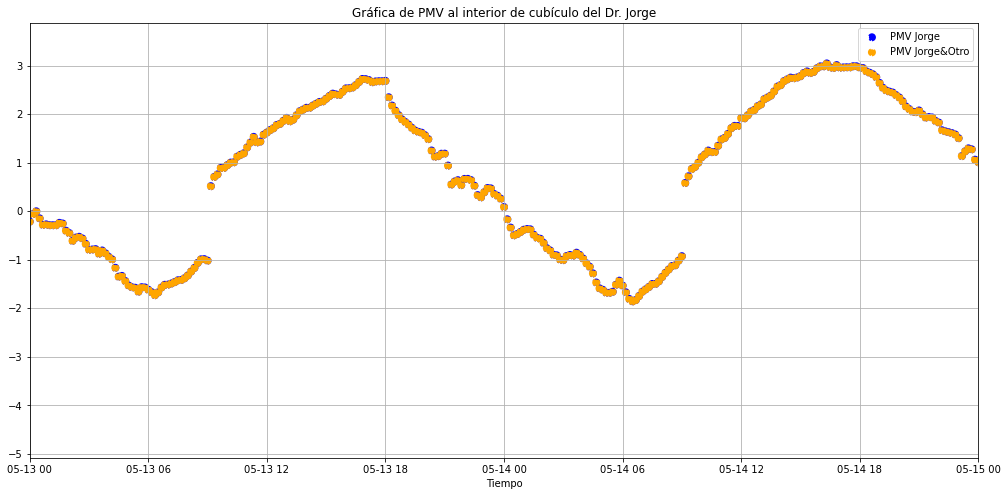

In [47]:
fig, ax = plt.subplots(figsize=(17,8))

fecha1 = parse('2019-05-13')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(Cper.index,Cper.PMV_jorge,linestyle='-.', linewidth=2, color='blue', label="PMV Jorge")
ax.scatter(Cper.index,Cper.PMV_Jorge_Otro,linestyle='--', linewidth=2, color='orange', label="PMV Jorge&Otro")
fin1 = Cper[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='',
       title='Gráfica de PMV al interior de cubículo del Dr. Jorge')
ax.legend()
ax.grid()

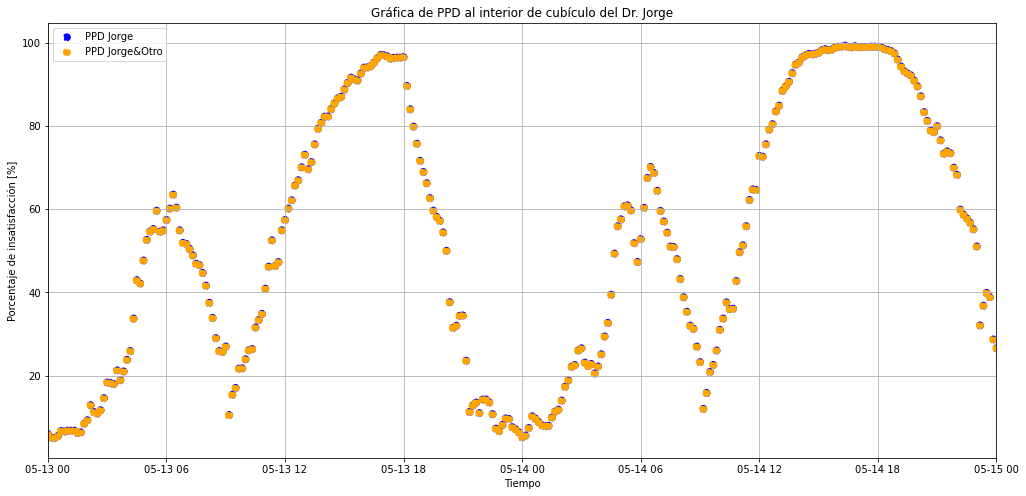

In [38]:
fig, ax = plt.subplots(figsize=(17,8))

fecha1 = parse('2019-05-13')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(Cper.index,Cper.PPD_jorge,linestyle='-.', linewidth=2, color='blue', label="PPD Jorge")
ax.scatter(Cper.index,Cper.PPD_Jorge_Otro,linestyle='--', linewidth=2, color='orange', label="PPD Jorge&Otro")
fin1 = Cper[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Porcentaje de insatisfacción [%]',
       title='Gráfica de PPD al interior de cubículo del Dr. Jorge')
ax.legend()
ax.grid()

In [42]:
#Importamos datos de estrategia de pintura blanca
Ces = pd.read_csv('../IDF/Caso_estrategia/Simulación_estrategia_bio.csv',names=['tiempo','PMV_jorge','PPD_jorge','PMV_Jorge_Otro','PPD_Jorge_Otro'],skiprows=1)
Ces.tiempo = Ces.tiempo.str.replace('24:00:00','23:59:59')
Ces.tiempo = '2019 ' + Ces.tiempo
Ces.tiempo = pd.to_datetime(Ces.tiempo,format='%Y %m/%d %H:%M:%S')
Ces.set_index('tiempo',inplace=True)
Ces

,PMV_jorge,PPD_jorge,PMV_Jorge_Otro,PPD_Jorge_Otro
tiempo,,,,
2019-05-03 00:10:00,-1.796818,66.855615,-1.796818,66.855615
2019-05-03 00:20:00,-1.754080,64.624309,-1.754080,64.624309
2019-05-03 00:30:00,-1.696428,61.560335,-1.696428,61.560335
2019-05-03 00:40:00,-1.773243,65.629555,-1.773243,65.629555
2019-05-03 00:50:00,-1.796057,66.816273,-1.796057,66.816273
...,...,...,...,...
2019-06-25 23:20:00,-13.629847,100.000000,-13.629847,100.000000
2019-06-25 23:30:00,-13.670448,100.000000,-13.670448,100.000000
2019-06-25 23:40:00,-13.710694,100.000000,-13.710694,100.000000


### Vamos a comparar los datos con los de la estrategia bioclimática

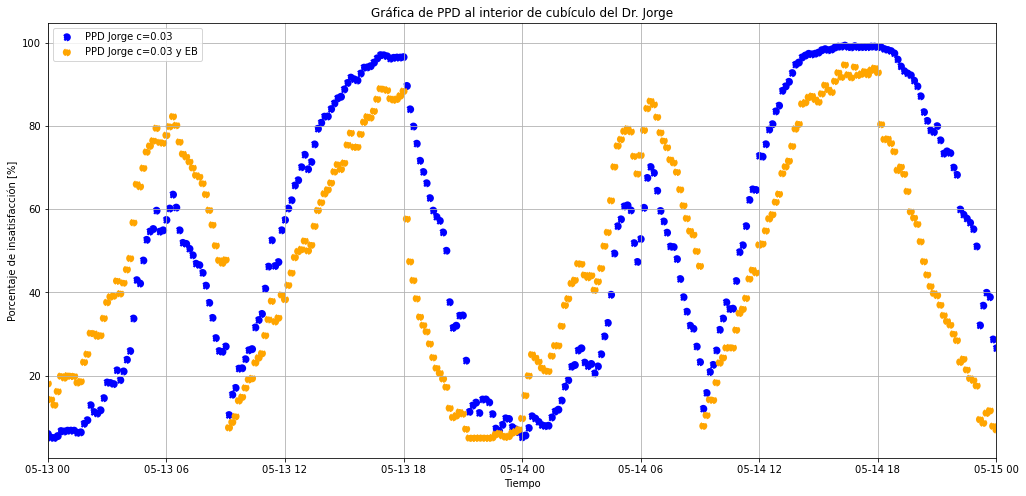

In [48]:
fig, ax = plt.subplots(figsize=(17,8))

fecha1 = parse('2019-05-13')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(Cper.index,Cper.PPD_jorge,linestyle='-.', linewidth=2, color='blue', label="PPD Jorge c=0.03")
ax.scatter(Ces.index,Ces.PPD_jorge,linestyle='--', linewidth=2, color='orange', label="PPD Jorge c=0.03 y EB")
fin1 = Ces[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Porcentaje de insatisfacción [%]',
       title='Gráfica de PPD al interior de cubículo del Dr. Jorge')
ax.legend()
ax.grid()

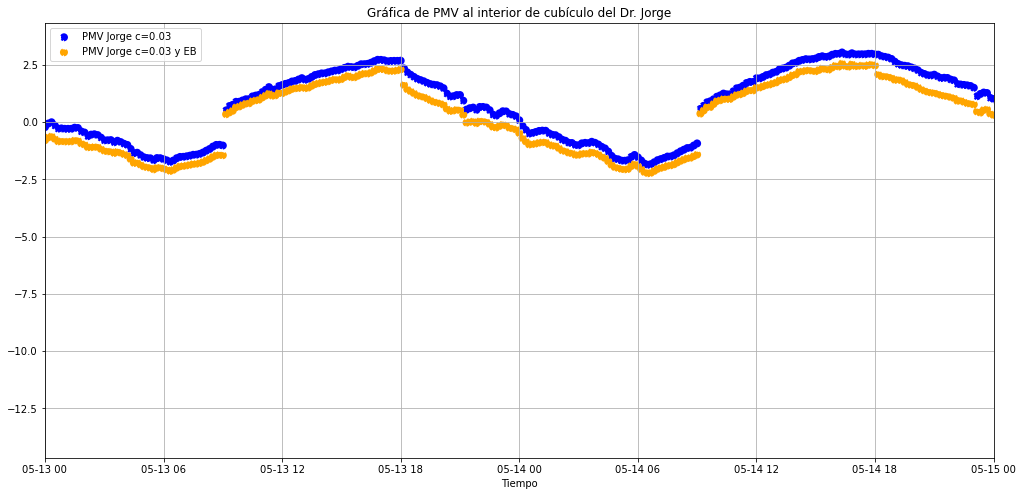

In [51]:
fig, ax = plt.subplots(figsize=(17,8))

fecha1 = parse('2019-05-13')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(Cper.index,Cper.PMV_jorge,linestyle='-.', linewidth=2, color='blue', label="PMV Jorge c=0.03")
ax.scatter(Ces.index,Ces.PMV_jorge,linestyle='--', linewidth=2, color='orange', label="PMV Jorge c=0.03 y EB")
fin1 = Ces[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='',
       title='Gráfica de PMV al interior de cubículo del Dr. Jorge')
ax.legend()
ax.grid()

In [46]:
Delta = ((Ces.PPD_jorge - Cper.PPD_jorge).mean()/Ces.PPD_jorge.mean())*100
Delta

6.256537214288262